In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

In [2]:
df = pd.read_csv("1008_aggregated_median.csv")
e = eval.evaluation(df)
df = e.norm_agg()
name = 'df'


/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1280 features were identified


In [3]:
exec(name + "_pre = eval.prec_mean(e.eval(" + name + ", operation = 'precision_recall'))")
exec(name + "_pre_r = e.eval(" + name + ", operation = 'precision_recall', eval_range='R').precision.mean()")
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

In [4]:
res = pd.concat([df_enr, df_pre], ignore_index=False, axis=1)
res.to_csv('results.csv')

res

,enrichment_percentile,threshold,ods_ratio,p-value,k,precision,recall
0,0.995,0.395813,9.768233,1.655298e-257,5.0,0.057743,0.048009
1,0.990,0.301032,7.380190,1.658866e-316,10.0,0.043745,0.063698
2,0.985,0.247142,6.294177,0.000000e+00,15.0,0.037212,0.079206
3,0.980,0.208980,5.672692,0.000000e+00,20.0,0.033027,0.091240
4,0.975,0.180624,5.122120,0.000000e+00,25.0,0.029991,0.099724
5,0.970,0.159923,4.686577,0.000000e+00,30.0,0.027734,0.109963
6,0.965,0.143557,4.289957,0.000000e+00,40.0,0.024891,0.129714
7,0.960,0.130222,3.935171,0.000000e+00,50.0,0.022870,0.147478


In [5]:
df_pre_r

0.05253272890763444

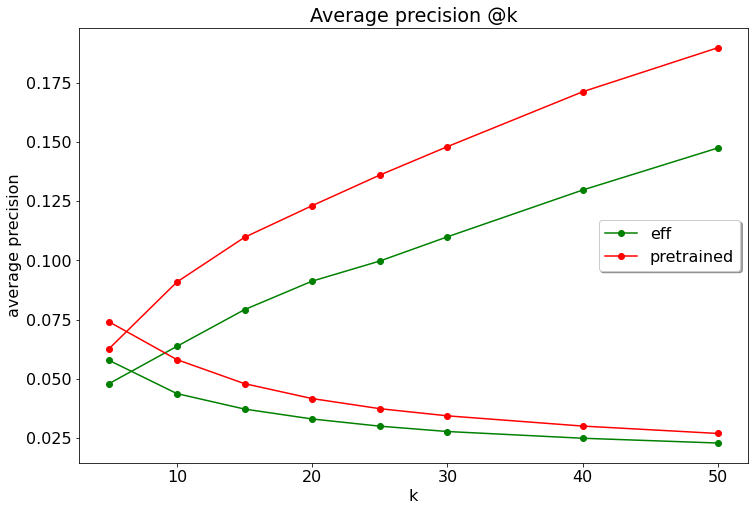

In [10]:
pretrained = pd.read_csv('/Users/mbornhol/git/neural-profiling/00_thesis/plot_storage/pre_tr_eff_pre.csv')
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(res["k"], res["precision"], marker="o", color="green", label = 'eff')
plt.plot(res["k"], res["recall"], marker="o", color="g")
plt.plot(pretrained["k"], pretrained["precision"], marker="o", color="r", label = 'pretrained')
plt.plot(pretrained["k"], pretrained["recall"], marker="o", color="r")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()


In [6]:
# compare to others
e = eval.evaluation(df_path= '../811/811_aggregated_median.csv')
con = e.norm_agg()
comp_enr = e.eval(con, operation = 'enrichment')
res_enr_baseline = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/results/res_enrichment_baseline.csv')

1280 features were identified


In [7]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')

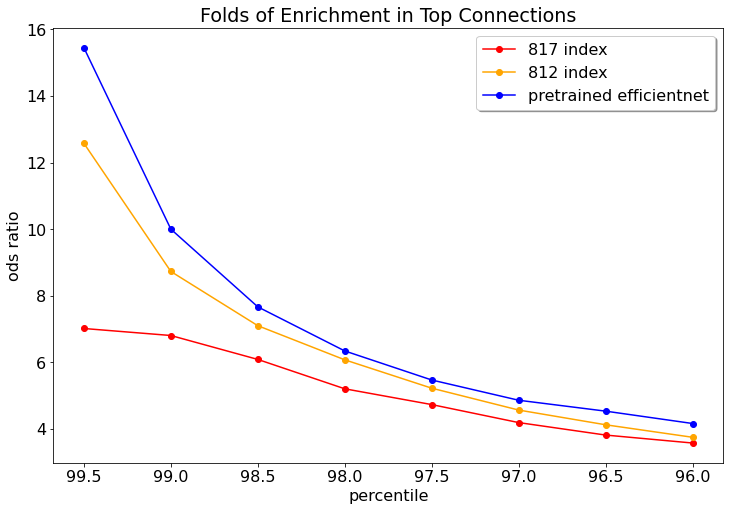

In [8]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res_enr["enrichment_percentile"], res_enr["ods_ratio"], marker="o", color="red", label = '817 index')
plt.plot(100*comp_enr["enrichment_percentile"], comp_enr["ods_ratio"], marker="o", color="orange", label = '812 index')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="blue", label = 'pretrained efficientnet')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

In [1]:
hitk('hitk',  index1=df_hit, label_1="pre-trained", index2=pre_hit, label_2="CP baseline")

NameError: name 'hitk' is not defined

In [2]:
df_hit


NameError: name 'df_hit' is not defined